# affine transform
<img src = "Affine_definition.png">

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("chessboard.png", 0)

pts_src = np.float32([[200,100],[400,100],[200,200]])
pts_dst = np.float32([[200,300],[400,200],[200,400]])

matrix_src = np.array([[pts_src[0][0],pts_src[1][0],pts_src[2][0]],[pts_src[0][1],pts_src[1][1],pts_src[2][1]],[1,1,1]])
matrix_dst = np.array([[pts_dst[0][0],pts_dst[1][0],pts_dst[2][0]],[pts_dst[0][1],pts_dst[1][1],pts_dst[2][1]],[1,1,1]])


In [27]:
inv_matrix_src= np.linalg.inv(matrix_src)
print(inv_matrix_src)

A = np.matmul(matrix_dst,inv_matrix_src)
affine_matrix = A[:2,:]
print(affine_matrix)

[[-0.005 -0.01   3.   ]
 [ 0.005 -0.    -1.   ]
 [-0.     0.01  -1.   ]]
[[ 1.00000000e+00  4.16333634e-17  0.00000000e+00]
 [-5.00000000e-01  1.00000000e+00  3.00000000e+02]]


Text(0.5, 1.0, 'src')

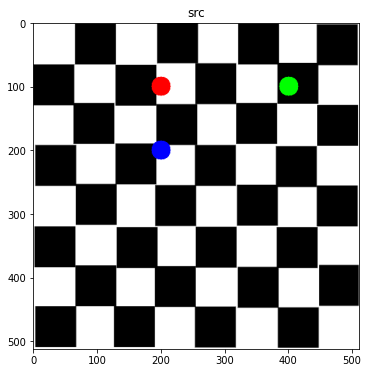

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("chessboard.png")

pts_src = np.array([[200, 100], [400, 100], [200, 200]])
pts_dst = np.array([[200, 300], [400, 200], [200, 400]])

src=cv2.circle(src, pts_src[0], 15, (255, 0, 0), -1)
src=cv2.circle(src, pts_src[1], 15, (0, 255, 0), -1)  
src=cv2.circle(src, pts_src[2], 15, (0, 0, 255), -1)  

matrix_src = np.array([[pts_src[0][0], pts_src[1][0], pts_src[2][0]], [pts_src[0][1], pts_src[1][1], pts_src[2][1]], [1, 1, 1]])
matrix_dst = np.array([[pts_dst[0][0], pts_dst[1][0], pts_dst[2][0]], [pts_dst[0][1], pts_dst[1][1], pts_dst[2][1]], [1, 1, 1]])

inv_matrix_src = np.linalg.inv(matrix_src)
A = np.matmul(matrix_dst, inv_matrix_src)
affine_matrix = A[:2, :]

plt.figure(figsize=(12, 6))
plt.imshow(src)
plt.title('src')


# warpAffine 사용

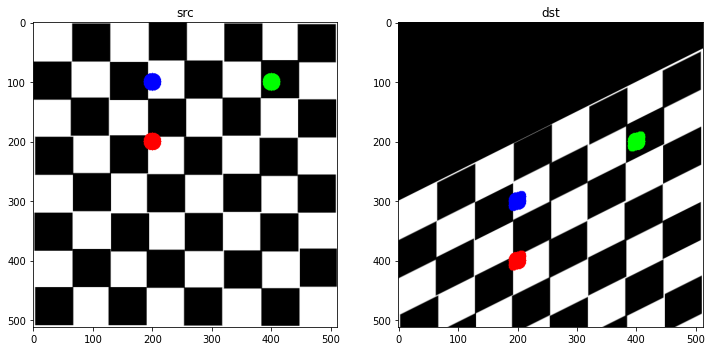

In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("chessboard.png")

pts_src = np.array([[200, 100], [400, 100], [200, 200]])
pts_dst = np.array([[200, 300], [400, 200], [200, 400]])

src_cir = cv2.circle(src, (pts_src[0][0], pts_src[0][1]), 15, (255, 0, 0), -1)  # 파란색 점
src_cir = cv2.circle(src, (pts_src[1][0], pts_src[1][1]), 15, (0, 255, 0), -1)  # 초록색 점
src_cir = cv2.circle(src, (pts_src[2][0], pts_src[2][1]), 15, (0, 0, 255), -1)  # 빨간색 점

matrix_src = np.array([[pts_src[0][0], pts_src[1][0], pts_src[2][0]], [pts_src[0][1], pts_src[1][1], pts_src[2][1]], [1, 1, 1]])
matrix_dst = np.array([[pts_dst[0][0], pts_dst[1][0], pts_dst[2][0]], [pts_dst[0][1], pts_dst[1][1], pts_dst[2][1]], [1, 1, 1]])

inv_matrix_src = np.linalg.inv(matrix_src)
A = np.matmul(matrix_dst, inv_matrix_src)
affine_matrix = A[:2, :]

# warpAffine 사용
dst = cv2.warpAffine(src, affine_matrix, (src.shape[1], src.shape[0]))

dst_cir = cv2.circle(dst, (pts_dst[0][0], pts_dst[0][1]), 15, (255, 0, 0), -1)  # 파란색 점
dst_cir = cv2.circle(dst, (pts_dst[1][0], pts_dst[1][1]), 15, (0, 255, 0), -1)  # 초록색 점
dst_cir = cv2.circle(dst, (pts_dst[2][0], pts_dst[2][1]), 15, (0, 0, 255), -1)  # 빨간색 점

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src_cir, cv2.COLOR_BGR2RGB))
plt.title('src')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst_cir, cv2.COLOR_BGR2RGB))
plt.title('dst')

plt.show()


# for문 활용

C:\Users\KpainK\AppData\Local\Temp\ipykernel_13424\2355285386.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_x, new_y = int(new_coord[0]), int(new_coord[1])


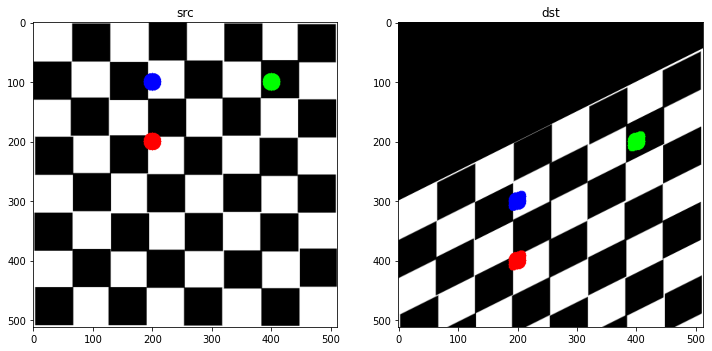

In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("chessboard.png")

pts_src = np.array([[200, 100], [400, 100], [200, 200]])
pts_dst = np.array([[200, 300], [400, 200], [200, 400]])

src = cv2.circle(src, (pts_src[0][0], pts_src[0][1]), 15, (255, 0, 0), -1)  # 파란색 점
src = cv2.circle(src, (pts_src[1][0], pts_src[1][1]), 15, (0, 255, 0), -1)  # 초록색 점
src = cv2.circle(src, (pts_src[2][0], pts_src[2][1]), 15, (0, 0, 255), -1)  # 빨간색 점

matrix_src = np.array([[pts_src[0][0], pts_src[1][0], pts_src[2][0]], [pts_src[0][1], pts_src[1][1], pts_src[2][1]], [1, 1, 1]])
matrix_dst = np.array([[pts_dst[0][0], pts_dst[1][0], pts_dst[2][0]], [pts_dst[0][1], pts_dst[1][1], pts_dst[2][1]], [1, 1, 1]])

inv_matrix_src = np.linalg.inv(matrix_src)
A = np.matmul(matrix_dst, inv_matrix_src)
affine_matrix = A[:2, :]

H, W, = src.shape[:2]


dst = np.zeros_like(src)

# 모든 픽셀을 반복하여 변환
for i in range(H):
    for j in range(W):
        # 원본 좌표
        original_coord = np.array([[j], [i], [1]])
        # 새로운 좌표 계산
        new_coord = np.matmul(affine_matrix, original_coord)
        new_x, new_y = int(new_coord[0]), int(new_coord[1])
        
        # 새로운 좌표가 이미지 크기 내에 있는지 확인
        if 0 <= new_x < W and 0 <= new_y < H:
            dst[new_y, new_x] = src[i, j]

dst_cir = cv2.circle(dst, (pts_dst[0][0], pts_dst[0][1]), 15, (255, 0, 0), -1)  # 파란색 점
dst_cir = cv2.circle(dst, (pts_dst[1][0], pts_dst[1][1]), 15, (0, 255, 0), -1)  # 초록색 점
dst_cir = cv2.circle(dst, (pts_dst[2][0], pts_dst[2][1]), 15, (0, 0, 255), -1)  # 빨간색 점

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst_cir, cv2.COLOR_BGR2RGB))
plt.title('dst')

plt.show()

# 200 이 늘어남

C:\Users\KpainK\AppData\Local\Temp\ipykernel_14556\2417227756.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_x, new_y = int(new_coord[0]), int(new_coord[1])


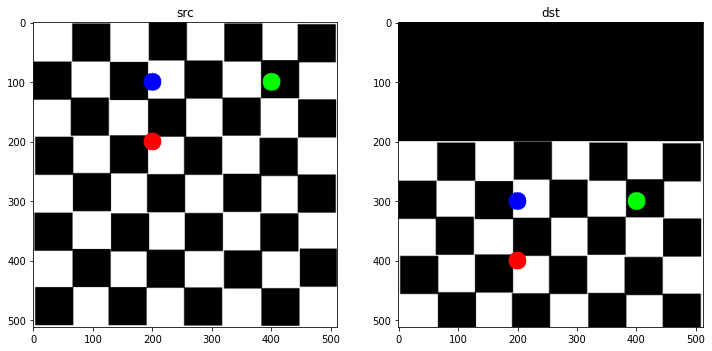

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("chessboard.png")

pts_src = np.array([[200, 100], [400, 100], [200, 200]])
pts_dst = np.array([[200, 300], [400, 300], [200, 400]])

src = cv2.circle(src, (pts_src[0][0], pts_src[0][1]), 15, (255, 0, 0), -1)  # 파란색 점
src = cv2.circle(src, (pts_src[1][0], pts_src[1][1]), 15, (0, 255, 0), -1)  # 초록색 점
src = cv2.circle(src, (pts_src[2][0], pts_src[2][1]), 15, (0, 0, 255), -1)  # 빨간색 점

matrix_src = np.array([[pts_src[0][0], pts_src[1][0], pts_src[2][0]], [pts_src[0][1], pts_src[1][1], pts_src[2][1]], [1, 1, 1]])
matrix_dst = np.array([[pts_dst[0][0], pts_dst[1][0], pts_dst[2][0]], [pts_dst[0][1], pts_dst[1][1], pts_dst[2][1]], [1, 1, 1]])

inv_matrix_src = np.linalg.inv(matrix_src)
A = np.matmul(matrix_dst, inv_matrix_src)
affine_matrix = A[:2, :]

H, W, = src.shape[:2]


dst = np.zeros_like(src)

# 모든 픽셀을 반복하여 변환
for i in range(H):
    for j in range(W):
        # 원본 좌표
        original_coord = np.array([[j], [i], [1]])
        # 새로운 좌표 계산
        new_coord = np.matmul(affine_matrix, original_coord)
        new_x, new_y = int(new_coord[0]), int(new_coord[1])
        
        # 새로운 좌표가 이미지 크기 내에 있는지 확인
        if 0 <= new_x < W and 0 <= new_y < H:
            dst[new_y, new_x] = src[i, j]

dst_cir = cv2.circle(dst, (pts_dst[0][0], pts_dst[0][1]), 15, (255, 0, 0), -1)  # 파란색 점
dst_cir = cv2.circle(dst, (pts_dst[1][0], pts_dst[1][1]), 15, (0, 255, 0), -1)  # 초록색 점
dst_cir = cv2.circle(dst, (pts_dst[2][0], pts_dst[2][1]), 15, (0, 0, 255), -1)  # 빨간색 점

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst_cir, cv2.COLOR_BGR2RGB))
plt.title('dst')

plt.show()

# 50, 100 이동

C:\Users\KpainK\AppData\Local\Temp\ipykernel_14556\1705175417.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_x, new_y = int(new_coord[0]), int(new_coord[1])


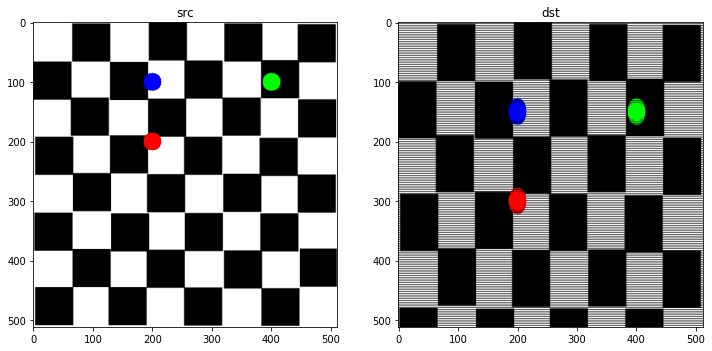

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("chessboard.png")

pts_src = np.array([[200, 100], [400, 100], [200, 200]])
pts_dst = np.array([[200, 150], [400, 150], [200, 300]])

src = cv2.circle(src, (pts_src[0][0], pts_src[0][1]), 15, (255, 0, 0), -1)  # 파란색 점
src = cv2.circle(src, (pts_src[1][0], pts_src[1][1]), 15, (0, 255, 0), -1)  # 초록색 점
src = cv2.circle(src, (pts_src[2][0], pts_src[2][1]), 15, (0, 0, 255), -1)  # 빨간색 점

matrix_src = np.array([[pts_src[0][0], pts_src[1][0], pts_src[2][0]], [pts_src[0][1], pts_src[1][1], pts_src[2][1]], [1, 1, 1]])
matrix_dst = np.array([[pts_dst[0][0], pts_dst[1][0], pts_dst[2][0]], [pts_dst[0][1], pts_dst[1][1], pts_dst[2][1]], [1, 1, 1]])

inv_matrix_src = np.linalg.inv(matrix_src)
A = np.matmul(matrix_dst, inv_matrix_src)
affine_matrix = A[:2, :]

H, W, = src.shape[:2]


dst = np.zeros_like(src)

# 모든 픽셀을 반복하여 변환
for i in range(H):
    for j in range(W):
        # 원본 좌표
        original_coord = np.array([[j], [i], [1]])
        # 새로운 좌표 계산
        new_coord = np.matmul(affine_matrix, original_coord)
        new_x, new_y = int(new_coord[0]), int(new_coord[1])
        
        # 새로운 좌표가 이미지 크기 내에 있는지 확인
        if 0 <= new_x < W and 0 <= new_y < H:
            dst[new_y, new_x] = src[i, j]

dst_cir = cv2.circle(dst, (pts_dst[0][0], pts_dst[0][1]), 15, (255, 0, 0), -1)  # 파란색 점
dst_cir = cv2.circle(dst, (pts_dst[1][0], pts_dst[1][1]), 15, (0, 255, 0), -1)  # 초록색 점
dst_cir = cv2.circle(dst, (pts_dst[2][0], pts_dst[2][1]), 15, (0, 0, 255), -1)  # 빨간색 점

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst_cir, cv2.COLOR_BGR2RGB))
plt.title('dst')

plt.show()

# 회전

C:\Users\KpainK\AppData\Local\Temp\ipykernel_14556\3009351875.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_x, new_y = int(new_coord[0]), int(new_coord[1])


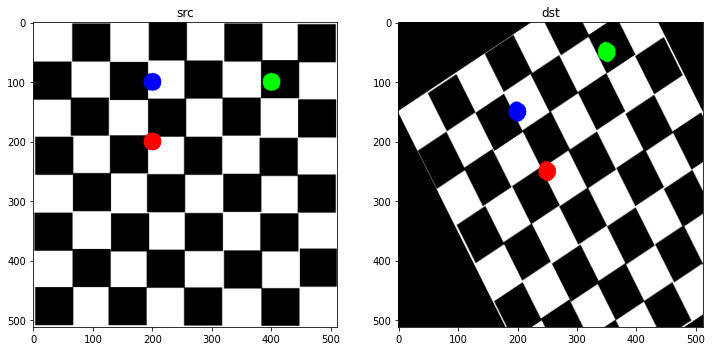

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("chessboard.png")

pts_src = np.array([[200, 100], [400, 100], [200, 200]])
pts_dst = np.array([[200, 150], [350, 50], [250, 250]])

src = cv2.circle(src, (pts_src[0][0], pts_src[0][1]), 15, (255, 0, 0), -1)  # 파란색 점
src = cv2.circle(src, (pts_src[1][0], pts_src[1][1]), 15, (0, 255, 0), -1)  # 초록색 점
src = cv2.circle(src, (pts_src[2][0], pts_src[2][1]), 15, (0, 0, 255), -1)  # 빨간색 점

matrix_src = np.array([[pts_src[0][0], pts_src[1][0], pts_src[2][0]], [pts_src[0][1], pts_src[1][1], pts_src[2][1]], [1, 1, 1]])
matrix_dst = np.array([[pts_dst[0][0], pts_dst[1][0], pts_dst[2][0]], [pts_dst[0][1], pts_dst[1][1], pts_dst[2][1]], [1, 1, 1]])

inv_matrix_src = np.linalg.inv(matrix_src)
A = np.matmul(matrix_dst, inv_matrix_src)
affine_matrix = A[:2, :]

H, W, = src.shape[:2]


dst = np.zeros_like(src)

# 모든 픽셀을 반복하여 변환
for i in range(H):
    for j in range(W):
        # 원본 좌표
        original_coord = np.array([[j], [i], [1]])
        # 새로운 좌표 계산
        new_coord = np.matmul(affine_matrix, original_coord)
        new_x, new_y = int(new_coord[0]), int(new_coord[1])
        
        # 새로운 좌표가 이미지 크기 내에 있는지 확인
        if 0 <= new_x < W and 0 <= new_y < H:
            dst[new_y, new_x] = src[i, j]

dst_cir = cv2.circle(dst, (pts_dst[0][0], pts_dst[0][1]), 15, (255, 0, 0), -1)  # 파란색 점
dst_cir = cv2.circle(dst, (pts_dst[1][0], pts_dst[1][1]), 15, (0, 255, 0), -1)  # 초록색 점
dst_cir = cv2.circle(dst, (pts_dst[2][0], pts_dst[2][1]), 15, (0, 0, 255), -1)  # 빨간색 점

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst_cir, cv2.COLOR_BGR2RGB))
plt.title('dst')

plt.show()

# cv2로 하는법

In [10]:
pts_src = np.float32([[200, 100], [400, 100], [200, 200]])
pts_dst = np.float32([[200, 300], [400, 200], [200, 400]])
np.set_printoptions(precision=3, suppress=True) # 배열을 출력할 때 소수점 이하 3자리까지 표기,과학적 표기법을 억제
M_cv2 =cv2.getAffineTransform(pts_src,pts_dst) # float 32값이 어야 함
print(M_cv2)

[[  1.    0.    0. ]
 [ -0.5   1.  300. ]]


# warpAffine 사용

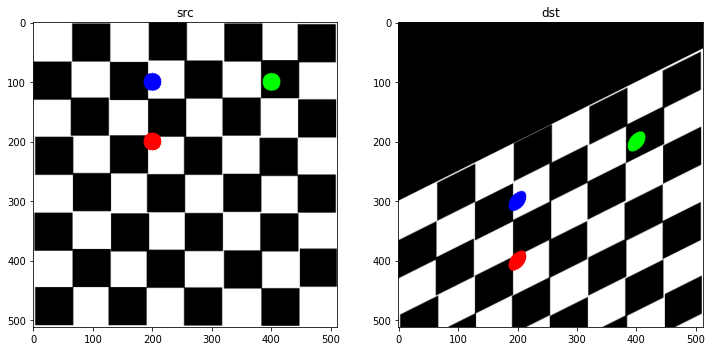

In [11]:
dst= cv2.warpAffine(src, M_cv2,(src.shape[1], src.shape[0]))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')

plt.show()

# 가상의 점을 이용한 affine transform

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

height = 500
width = 300
red = (0, 0, 255)
src = np.zeros((height, width, 3), dtype=np.uint8)
src[:,:] = red

src_pts = np.float32([[0, 0], [width-1, 0], [width-1, height-1], [0, height-1]])

dst_size = 300
dst_pts = np.float32([[0, 0], [dst_size-1, 0], [dst_size-1, dst_size-1], [0, dst_size-1]])

M = cv2.getPerspectiveTransform(src_pts, dst_pts)

dst = cv2.warpPerspective(src, M, (dst_size, dst_size))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')

plt.show()

# 3번 src를 클릭하고 3번 dst를 클릭해서 적용하기

# 사람 얼굴 더하기 addweighted

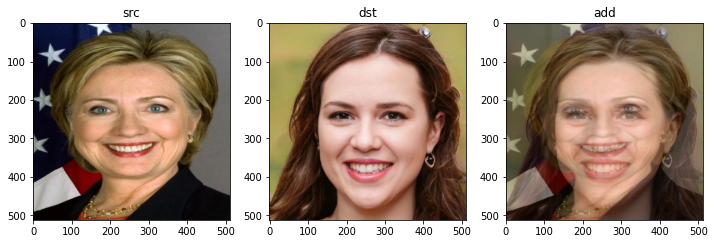

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("hillary.jpg")
dst = cv2.imread("woman.jpg")
dst = cv2.resize(dst,(src.shape[1],src.shape[0]))

add = cv2.addWeighted(src,0.5,dst,0.5,0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(add, cv2.COLOR_BGR2RGB))
plt.title('add')

plt.show()

# warpAffine 후에 addWeighted 사용

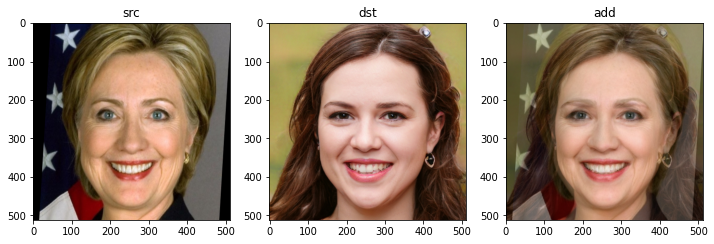

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("hillary.jpg")

pts_src = np.float32([[176,227],[317,221],[254,327]])
pts_dst = np.float32([[193,240],[322,238],[256,380]])

matrix_src = np.array([[pts_src[0][0], pts_src[1][0], pts_src[2][0]], [pts_src[0][1], pts_src[1][1], pts_src[2][1]], [1, 1, 1]])
matrix_dst = np.array([[pts_dst[0][0], pts_dst[1][0], pts_dst[2][0]], [pts_dst[0][1], pts_dst[1][1], pts_dst[2][1]], [1, 1, 1]])

inv_matrix_src = np.linalg.inv(matrix_src)
A = np.matmul(matrix_dst, inv_matrix_src)
affine_matrix = A[:2, :]

# warpAffine 사용
dst = cv2.warpAffine(src, affine_matrix, (src.shape[1], src.shape[0]))

src = dst
dst = cv2.imread("woman.jpg")

add = cv2.addWeighted(src,0.5,dst,0.5,0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(add, cv2.COLOR_BGR2RGB))
plt.title('add')

plt.show()

# Morphing
- Fps(Frame/sec)를 정의
- pt(play time)를 정의

In [32]:
from matplotlib import transforms
import numpy as np
import cv2

src = cv2.imread("hillary.jpg",cv2.COLOR_BGR2RGB)
dst = cv2.imread("woman.jpg")

pt_src = np.float32([[176,227],[317,221],[254,327]])
pt_target = np.float32([[193,240],[322,238],[256,380]])

fps = 60
pt= 2
frames= fps*pt
r_list= np.linspace(0,1,frames)

cv2.namedWindow('test',cv2.WINDOW_NORMAL)
for r in r_list: 
    # 중간점을 계산
    pts_dst = (1-r)*pt_src+r*pt_target
    # apffine 변환 행렬
    src_affine = cv2.getAffineTransform(pt_src,pts_dst)
    # 원본 이미지를 변환
    src_warped = cv2.warpAffine(src,src_affine,(src.shape[1], src.shape[0]))
    # morph 
    morph = cv2.addWeighted(src_warped,0.5,dst,0.5,0)

    cv2.imshow('test',morph)
    cv2.waitKey(int(1000/fps))

cv2.destroyAllWindows()

# perspective

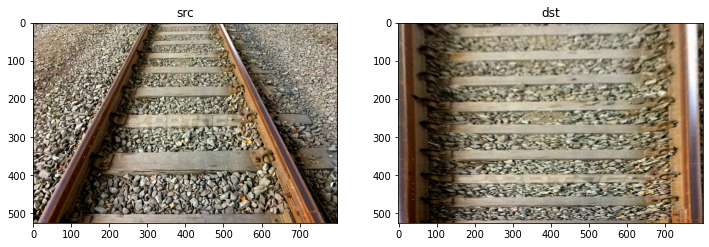

In [40]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("railroad.jpg")

H,W = src.shape[:2]

pts_src = np.float32([[297,0],[13,H-1],[500,0],[766, H-1]])
pts_dst = np.float32([[0,0],[0,H-1],[W-1,0],[W-1,H-1]])

src_trans = cv2.getPerspectiveTransform(pts_src, pts_dst)

dst= cv2.warpPerspective(src, src_trans,(src.shape[1], src.shape[0]))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')

plt.show()

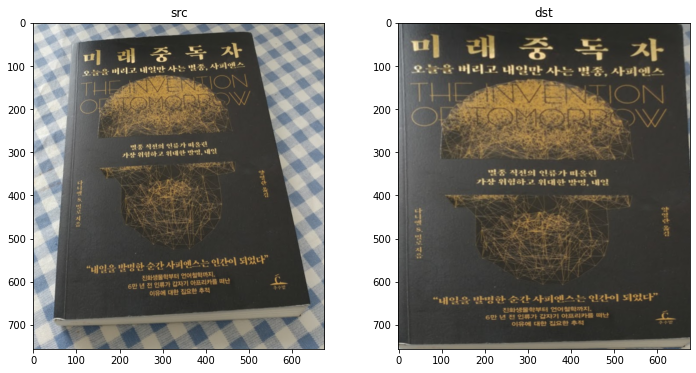

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("book.jpg")

H,W = src.shape[:2]

pts_src = np.float32([[100,50],[50,700],[515,20],[630,685]])
pts_dst = np.float32([[0,0],[0,H-1],[W-1,0],[W-1,H-1]])

src_trans = cv2.getPerspectiveTransform(pts_src, pts_dst)

dst= cv2.warpPerspective(src, src_trans,(src.shape[1], src.shape[0]))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')

plt.show()

# 가상의 점을 이용한 perspective transform

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

height = 500
width = 300
red = (0, 0, 255)

src = np.zeros((height, width, 3), dtype=np.uint8)

pts_tri = [[0, height-1], [int(width/2), 0], [width-1, height-1]]
cv2.fillConvexPoly(src, np.array(pts_tri), red)

side_length = 300

pts_src = np.float32([[0, height-1], [int(width/2), 0], [width-1, height-1]])

height_equilateral = int(np.sqrt(side_length**2 - (side_length/2)**2))

pts_dst = np.float32([[0, side_length-1], [side_length/2, side_length-1-height_equilateral], [side_length-1, side_length-1]])

M_cv2 = cv2.getAffineTransform(pts_src, pts_dst)

dst = cv2.warpAffine(src, M_cv2, (src.shape[1], src.shape[0]))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')

plt.show()

# axis 표시하고 눈대중으로 점 찍기

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("trapezoid.png")
src_pts= np.float32([[84,0],[225,0],[225, 300-1],[18,300-1]])

dst_size = 300
dst_pts = np.float32([[0, 0], [dst_size-1, 0], [dst_size-1, dst_size-1], [0, dst_size-1]])

M = cv2.getPerspectiveTransform(src_pts, dst_pts)

dst = cv2.warpPerspective(src, M, (dst_size, dst_size))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')

plt.show()

# 4점 찍고 perspective transform

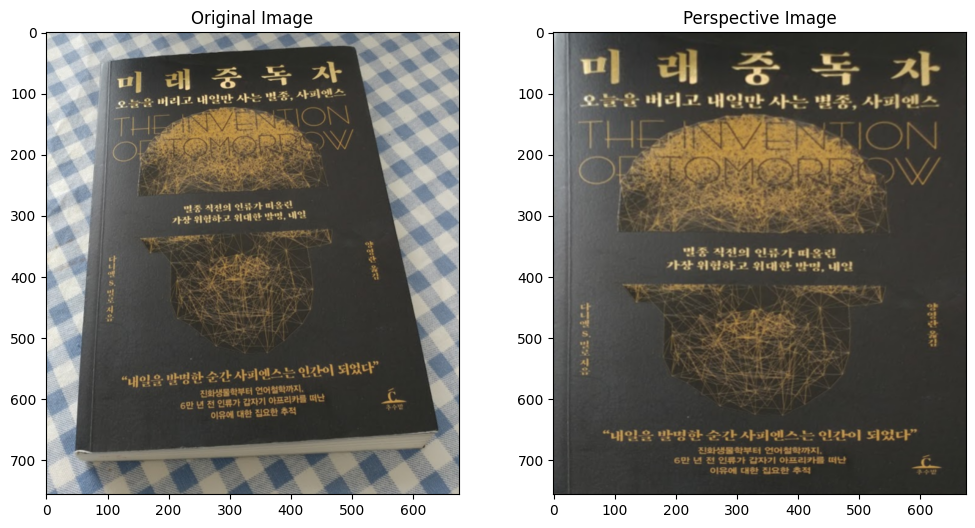

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 마우스 콜백 함수 정의
def get_points(event, x, y, flags, param):
    global pts_src, count, img_copy
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 버튼 클릭 시
        pts_src.append([x, y])  # 클릭한 좌표를 리스트에 추가
        count += 1  # 클릭한 점의 개수 증가
        cv2.circle(img_copy, (x, y), 5, (0, 255, 0), -1)  # 초록색 점 그리기
        cv2.imshow('Select Points', img_copy)  # 이미지 업데이트하여 표시
        if count == 4:  # 4개의 점을 모두 선택했을 때
            cv2.destroyAllWindows()  # 윈도우 닫기

# 이미지 로드
src = cv2.imread("book.jpg")  # 이미지를 읽어옵니다
H, W = src.shape[:2]  # 이미지의 높이와 너비를 가져옵니다
img_copy = src.copy()  # 원본 이미지를 복사하여 사용합니다

# 원근 변환을 위한 점 설정을 위한 초기화
pts_src = []  # 클릭한 점들을 저장할 리스트
count = 0  # 클릭한 점의 개수를 세는 변수

# 마우스 콜백 설정
cv2.namedWindow('Select Points')  # 윈도우 생성
cv2.setMouseCallback('Select Points', get_points)  # 마우스 콜백 함수 설정

# 사용자가 4개의 점을 선택할 때까지 대기
cv2.imshow('Select Points', img_copy)  # 이미지를 윈도우에 표시
cv2.waitKey(0)  # 키 입력을 대기

# 변환할 대상 점 설정
pts_dst = np.float32([[0, 0], [0, H-1], [W-1, 0], [W-1, H-1]])  # 대상 점 좌표 설정

# 원근 변환 행렬 계산
if len(pts_src) == 4:  # 4개의 점을 모두 선택했을 때
    pts_src = np.float32(pts_src)  # 소스 점 좌표를 float32 형식으로 변환
    matrix = cv2.getPerspectiveTransform(pts_src, pts_dst)  # 원근 변환 행렬 계산

    # 원근 변환 적용
    dst = cv2.warpPerspective(src, matrix, (W, H))  # 원근 변환을 적용하여 이미지 변환

    # 결과 이미지 표시
    plt.figure(figsize=(12, 6))  # 그래프 크기 설정
    plt.subplot(121), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)), plt.title('Original Image')  # 원본 이미지 표시
    plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), plt.title('Perspective Image')  # 변환된 이미지 표시
    plt.show()  # 그래프 출력
else:
    print("4개의 점을 선택해야 합니다.") 

In [4]:
import dlib
print(dlib.DLIB_USE_CUDA)

True


In [3]:
dlib.DLIB_USE_CUDA = True